OBJECTIVE: Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy

# Import libraries

In [ ]:
# IMPORT LIBRARIES

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# Get and inspect data from sklearn

In [ ]:
from sklearn.datasets import make_moons

dataset = make_moons(n_samples=1000, shuffle=True, noise=0.03, random_state=42)

# sklearn.datasets.make_moons() is a toy dataset to visualise clustering and classification algorithms
# returns ndarray of floats in shape (n, 2) 
# also returns ndarray of integers in shape (n, )

X, y = dataset

print(X[:10], y[:10])
# see first 10 values for X and y

print()

print(X.shape, y.shape)


[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]
 [ 0.57954249 -0.35297867]
 [ 0.29488426 -0.20923768]
 [-0.01448804  0.4358961 ]
 [ 1.62651037 -0.28120742]
 [ 0.67159767  0.78642227]] [1 1 1 1 0 1 1 1 1 0]

(1000, 2) (1000,)


In [ ]:
# create a dataframe to inspect the data

dataframe = pd.DataFrame({
    'X0': X[:,0],
    'X1': X[:,1],
    'y': y
})

dataframe

,X0,X1,y
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


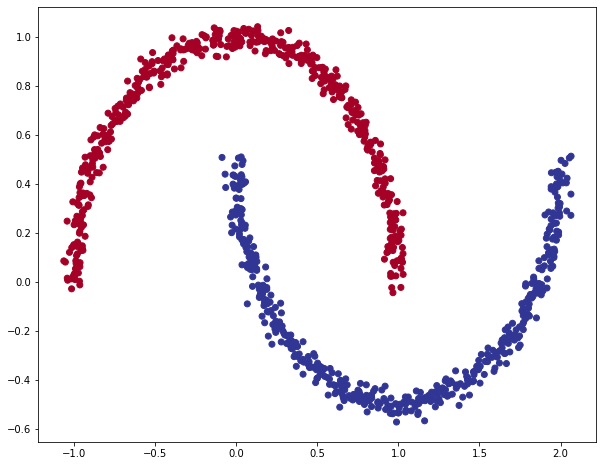

In [ ]:
# visualise the data with a plot

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


# Build a model that will be able to tell the two sets of dots apart

In [ ]:
# create training and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inspect first 10 values for each dataset

print(X_train[:10], '\n')
print(X_test[:10], '\n')
print(y_train[:10], '\n')
print(y_test[:10], '\n')

[[ 1.97580347  0.20764306]
 [-0.96081311  0.40074871]
 [-0.09858057  1.02310006]
 [-0.10825703  0.99187401]
 [ 0.37671714 -0.26195142]
 [-0.22371904  0.95288644]
 [ 0.53710443 -0.35857357]
 [ 0.10129574  0.0867499 ]
 [ 0.46608775  0.89453434]
 [-0.96304267  0.20698162]] 

[[ 0.51717252 -0.37846148]
 [ 0.7535605   0.68706057]
 [ 1.24080164 -0.45972027]
 [ 0.62357864  0.84083018]
 [ 1.85259753 -0.04540386]
 [ 1.95863276  0.10537051]
 [ 0.98721923  0.28029274]
 [ 1.01661637  0.09719884]
 [ 1.16188881 -0.56673475]
 [ 0.71892264  0.66150418]] 

[1 0 0 0 1 0 1 1 0 0] 

[1 0 1 0 1 1 0 0 1 0] 



In [ ]:
# SET SEED

tf.random.set_seed(42)


# CREATE MODEL

model_1 = keras.Sequential([
                            keras.layers.Dense(10, activation='relu'),
                            keras.layers.Dense(1, activation='sigmoid')
                            
], name='model_1')


# COMPILE MODEL

model_1.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics='accuracy'
)


# CREATE LEARNING RATE CALL BACK

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# FIT MODEL

m1 = model_1.fit(
    X_train,
    y_train,
    verbose=2,
    epochs=60,
    validation_data=(X_test, y_test),
    callbacks=lr_scheduler,
)

Epoch 1/60
25/25 - 1s - loss: 0.6461 - accuracy: 0.5000 - val_loss: 0.6581 - val_accuracy: 0.5000
Epoch 2/60
25/25 - 0s - loss: 0.6425 - accuracy: 0.5000 - val_loss: 0.6546 - val_accuracy: 0.5000
Epoch 3/60
25/25 - 0s - loss: 0.6386 - accuracy: 0.5000 - val_loss: 0.6507 - val_accuracy: 0.5000
Epoch 4/60
25/25 - 0s - loss: 0.6342 - accuracy: 0.5000 - val_loss: 0.6464 - val_accuracy: 0.5000
Epoch 5/60
25/25 - 0s - loss: 0.6294 - accuracy: 0.5000 - val_loss: 0.6415 - val_accuracy: 0.5000
Epoch 6/60
25/25 - 0s - loss: 0.6239 - accuracy: 0.4988 - val_loss: 0.6361 - val_accuracy: 0.5000
Epoch 7/60
25/25 - 0s - loss: 0.6179 - accuracy: 0.5113 - val_loss: 0.6301 - val_accuracy: 0.5300
Epoch 8/60
25/25 - 0s - loss: 0.6111 - accuracy: 0.5375 - val_loss: 0.6233 - val_accuracy: 0.5500
Epoch 9/60
25/25 - 0s - loss: 0.6037 - accuracy: 0.5537 - val_loss: 0.6157 - val_accuracy: 0.5400
Epoch 10/60
25/25 - 0s - loss: 0.5952 - accuracy: 0.5750 - val_loss: 0.6073 - val_accuracy: 0.5750
Epoch 11/60
25/25 -

# Optimise our model

## Plot out learning rate decay curve to establish best LR to begin with

Text(0.5, 1.0, 'learning rate decay curve')

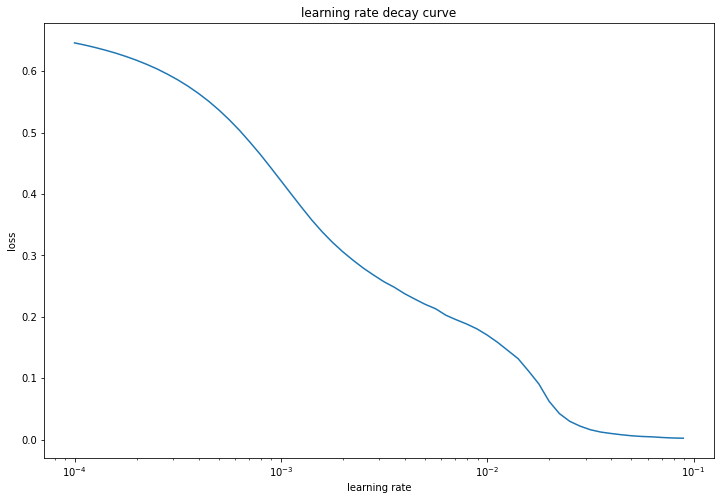

In [ ]:
# plot out the learning rate decay curve

# get LR scheduler

lrs = 1e-4 * 10**(np.arange(60) / 20) # can also use tf.range(60), where 60 == epochs

# get loss

loss = m1.history['loss']

# plot learning rate decay curve with LR and loss

plt.figure(figsize=(12,8))
plt.semilogx(lrs, loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate decay curve')

In [ ]:
# the curve really starts to dip from 1e-2 (10**-2) and starts to flatten at 1e-1
# so let's adjust our model's Adam's learning rate to 0.01, where LR is still decreasing and hasn't bottomed out

## Plot out our loss curve

<Figure size 720x720 with 0 Axes>

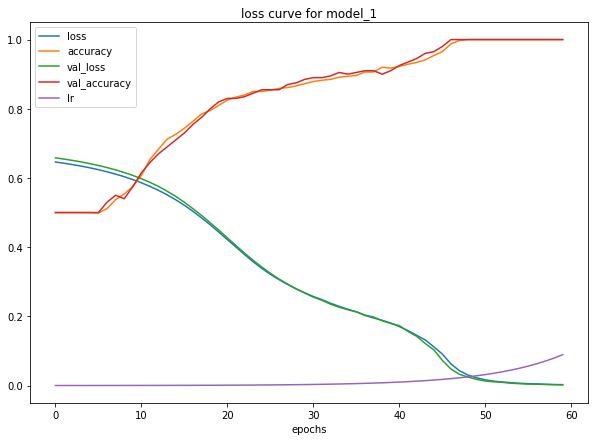

In [ ]:
plt.figure(figsize=(10,10))
pd.DataFrame(m1.history).plot(figsize=(10,7), title='loss curve for model_1', xlabel='epochs')

In [ ]:
# by 50 epochs, we reach accuracy of 100%

## Evaluate model

In [ ]:
model_1.evaluate(X_test, y_test)
# accuracy is 100%

7/7 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000


[0.0020882415119558573, 1.0]

## Final model

In [ ]:
# tweak the LR and epochs based on findings above, and remove the callback


# SET SEED

tf.random.set_seed(42)


# CREATE MODEL

model_2 = keras.Sequential([
                            keras.layers.Dense(10, activation='relu'),
                            keras.layers.Dense(1, activation='sigmoid')
                            
], name='model_2')


# COMPILE MODEL

model_2.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics='accuracy'
)


# FIT MODEL

m2 = model_2.fit(
    X_train,
    y_train,
    verbose=2,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=lr_scheduler,
)

# EVALUATE MODEL

model_2.evaluate(X_test, y_test)


Epoch 1/50
25/25 - 0s - loss: 0.6461 - accuracy: 0.5000 - val_loss: 0.6581 - val_accuracy: 0.5000
Epoch 2/50
25/25 - 0s - loss: 0.6425 - accuracy: 0.5000 - val_loss: 0.6546 - val_accuracy: 0.5000
Epoch 3/50
25/25 - 0s - loss: 0.6386 - accuracy: 0.5000 - val_loss: 0.6507 - val_accuracy: 0.5000
Epoch 4/50
25/25 - 0s - loss: 0.6342 - accuracy: 0.5000 - val_loss: 0.6464 - val_accuracy: 0.5000
Epoch 5/50
25/25 - 0s - loss: 0.6294 - accuracy: 0.5000 - val_loss: 0.6415 - val_accuracy: 0.5000
Epoch 6/50
25/25 - 0s - loss: 0.6239 - accuracy: 0.4988 - val_loss: 0.6361 - val_accuracy: 0.5000
Epoch 7/50
25/25 - 0s - loss: 0.6179 - accuracy: 0.5113 - val_loss: 0.6301 - val_accuracy: 0.5300
Epoch 8/50
25/25 - 0s - loss: 0.6111 - accuracy: 0.5375 - val_loss: 0.6233 - val_accuracy: 0.5500
Epoch 9/50
25/25 - 0s - loss: 0.6037 - accuracy: 0.5537 - val_loss: 0.6157 - val_accuracy: 0.5400
Epoch 10/50
25/25 - 0s - loss: 0.5952 - accuracy: 0.5750 - val_loss: 0.6073 - val_accuracy: 0.5750
Epoch 11/50
25/25 -

[0.017791438847780228, 1.0]

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# Plot decision boundary with final model

In [ ]:
# decision boundary plot function is... 

def plot_decision_boundary(model, X, y):

  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  #plt.figure(figsize=(10, 10)) # must come before .scatter()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.RdYlBu) # s is size of dot
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...
doing binary classifcation...


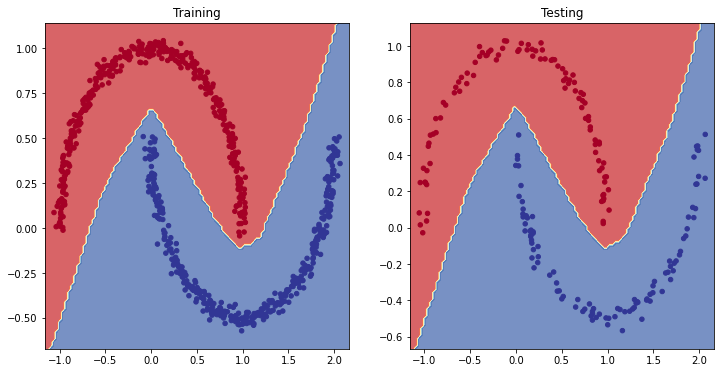

In [ ]:
# Plot the decision boundaries for the training and test sets 

plt.figure(figsize=(12, 6))

# train
plt.subplot(1, 2, 1)
plot_decision_boundary(model_2, X=X_train, y=y_train)
plt.title('Training');

# test
plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X=X_test, y=y_test)
plt.title('Testing');

# Make a prediction with model

In [ ]:
# use sample X_test data

# X_test.shape reveals we have 200 rows, let's pick two rows

# X_sample = X_test[122:124] 
# so we can use the above to pick rows 122 and 123
# OR WE CAN DO SOMETHING MORE COMPLICATED BY PICKING 3 ROWS WHICH ARE AT DIFF INDEXES

# see 3 random X_test values

print(X_test[122], X_test[52], X_test[150])

print()


# get them into the right shape

X_sample = np.ravel( (X_test[122], X_test[52], X_test[150]) ).reshape(3,2)
            
print(X_sample) 
# np.ravel() merges it all into a 1D array (vector), also try np.concatenate()
# then np.reshape() turns it into a 2D array (matrix) we can feed into our model 

print()


# predict with model

y_preds = model_2.predict(X_sample)

print(y_preds)
# !!! the model predicts with a probability value (0 to 1)
# coz Sigmoid activation function is used in the models output layer

print()


# round the predictions so we can compare it with actual labels

y_preds = np.round(y_preds)

print(y_preds)
# [[0.]
# [0.]]
# [1.]]


[-0.99049351  0.250411  ] [-0.98495478  0.24943608] [1.99253499 0.28252528]

[[-0.99049351  0.250411  ]
 [-0.98495478  0.24943608]
 [ 1.99253499  0.28252528]]

[[0.00342622]
 [0.00367865]
 [0.984732  ]]

[[0.]
 [0.]
 [1.]]


In [ ]:
# compare predictions with actual labels in y_test

actual = list( (y_test[122], y_test[52], y_test[150]) ) 
# list() method converts values in a tuple (...) to a list [...]

print(actual)

print()


# turn our 2D y_preds array into a 1D list (vector), so it's the same shape as actual

y_preds = np.ravel(y_preds)

print(y_preds)

print()


# let's compare!

if all(y_preds == actual):
  print('Predictions match actual labels!')
  print('Predictions are {y_preds} and actual labels are {actual}.'.format(y_preds=y_preds, actual=actual) )
else:
  print('Predictions do not match actual labels')


# our model has an accuracy of 100% so any predictions should match actual labels of the same index


[0, 0, 1]

[0. 0. 1.]

Predictions match actual labels!
Predictions are [0. 0. 1.] and actual labels are [0, 0, 1].
